# Q. Use the fashion mnist dataset and create ANN and CNN models


### from tensorflow.keras.datasets import fashion_mnist

### labels =["T-shirt/top","Trouser","Pullover","Dress",
###     "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
### (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Retrieving dataset 

In [68]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# Exploring data and shapes

In [50]:
type(train_images)

numpy.ndarray

In [47]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [48]:
labels =["T-shirt/top","Trouser","Pullover","Dress",
    "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

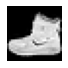

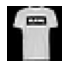

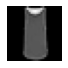

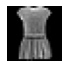

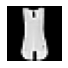

In [14]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(train_images[i], 
               cmap='gray')
    plt.axis('off')

In [23]:
print(train_images.shape,train_labels.shape)
# 6000*height*width

(60000, 28, 28) (60000,)


# scaling

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [28]:
X_train=train_images.reshape(60000,784) #28*28=784

In [30]:
X_train.shape

(60000, 784)

# building a model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model=Sequential()
model.add(Dense(units=400,  #784+10/2
                input_dim=784,  #28*28
                activation='relu',name='First_hidden_layer'))
# units is avg of input (dim+output dim)/2 784+10/2 =approx 400

model.add(Dense(units=10,
                activation='softmax',
                name='output_layer'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_hidden_layer (Dense)   (None, 400)               314000    
_________________________________________________________________
output_layer (Dense)         (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [52]:
784*400+400

314000

In [53]:
10*400+10

4010

# compile  the model 

In [27]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

# fit the model 

In [31]:
model.fit(X_train,train_labels,batch_size=200,epochs=5)

Epoch 1/5
300/300 [==============================] - 4s 8ms/step - loss: 0.5350 - accuracy: 0.8155
Epoch 2/5
300/300 [==============================] - 2s 7ms/step - loss: 0.3899 - accuracy: 0.8640
Epoch 3/5
300/300 [==============================] - 2s 7ms/step - loss: 0.3526 - accuracy: 0.8749
Epoch 4/5
300/300 [==============================] - 2s 7ms/step - loss: 0.3166 - accuracy: 0.8857
Epoch 5/5
300/300 [==============================] - 2s 7ms/step - loss: 0.3024 - accuracy: 0.8903


# save the model

In [34]:
from tensorflow.keras.models import save_model

save_model(model,'fashion_mnist_model_saved.h5')

In [35]:
model.get_weights()

[array([[-0.00998541,  0.02339773,  0.02146466, ...,  0.06177979,
          0.03277954, -0.04549805],
        [ 0.00965108, -0.08371768, -0.03705139, ..., -0.10923292,
         -0.0587396 ,  0.07674629],
        [ 0.01224461, -0.09033909, -0.04042749, ..., -0.09021066,
         -0.14067025,  0.05734757],
        ...,
        [-0.07270227,  0.06160633, -0.04159858, ..., -0.09654815,
         -0.06484095,  0.12119791],
        [-0.05539514,  0.03197972, -0.08636333, ...,  0.04455616,
          0.05724497, -0.05584816],
        [ 0.00281881,  0.06198414, -0.09608177, ...,  0.03522016,
         -0.07717317,  0.0797065 ]], dtype=float32),
 array([ 0.11010423,  0.13906458,  0.05178224, -0.07117777, -0.00768502,
         0.06765353, -0.03423186,  0.08774155,  0.05165452, -0.03965942,
        -0.01451265,  0.06571803,  0.1224829 , -0.03790891,  0.0769251 ,
         0.0816813 ,  0.05896216,  0.09000943,  0.01622074,  0.00409009,
        -0.02842592,  0.03279338,  0.12495513,  0.13159652,  0.044

# Testing a model

In [36]:
test_images.shape

(10000, 28, 28)

In [61]:
model.predict(test_images.reshape(10000,784))

array([[0.  , 0.  , 0.  , ..., 0.07, 0.  , 0.91],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.06, 0.01, 0.  ]], dtype=float32)

In [63]:
np.set_printoptions(suppress=True, precision=2)
in_mat = test_images[1]
print(in_mat.shape)
model.predict(in_mat.reshape(1,784))

(28, 28)


array([[0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [69]:
X_test=test_images.reshape(10000,784)

In [70]:
X_test.shape

(10000, 784)

In [72]:
y_pred=model.predict(X_test)

In [73]:
y_pred.shape

(10000, 10)

In [74]:
y_pred[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
np.argmax(y_pred[1])

2

In [78]:
test_labels[1]

2

# test a row with origional label

In [80]:
np.argmax(y_pred[1])==test_labels[1]
# label match correct predicted

True

# CNN

# Convolution Network

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [121]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images
train_labels=train_labels.reshape

In [122]:
# normalize to within range 0 to 1
train_images= train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [127]:
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                input_shape=(28,28,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # unit one because we want to check either dog or cat
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [128]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='accuracy')

In [129]:
type(train_images)

numpy.ndarray

In [130]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2


ValueError: in user code:

    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\abc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
